In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [2]:
df=pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
df.shape

(1000, 9)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [11]:
for col in df.select_dtypes('object'):
    print(col)
    print(df[col].value_counts())
    print('---------------')

Sex
male      690
female    310
Name: Sex, dtype: int64
---------------
Housing
own     713
rent    179
free    108
Name: Housing, dtype: int64
---------------
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
---------------
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
---------------
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64
---------------


In [13]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

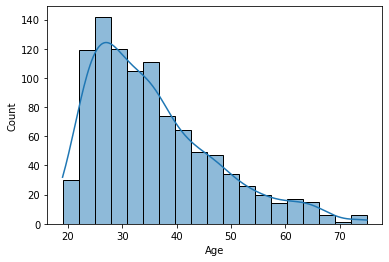

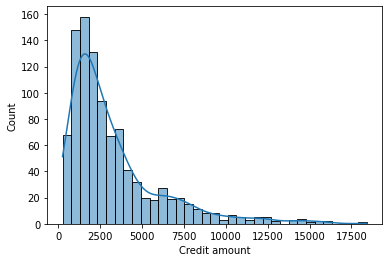

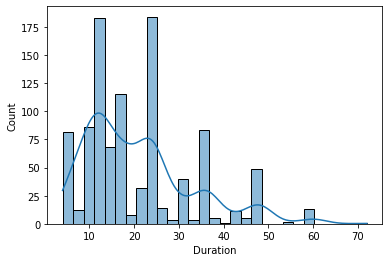

In [22]:
sns.histplot(df['Age'],kde=True)
plt.show()
sns.histplot(df['Credit amount'],kde=True)
plt.show()
sns.histplot(df['Duration'],kde=True)
plt.show()


c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

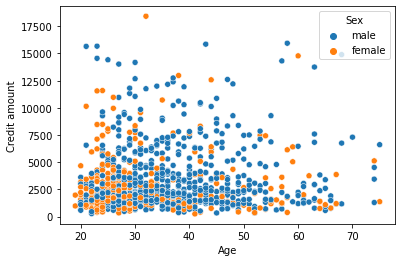

In [21]:
sns.scatterplot(df['Age'],df['Credit amount'],hue=df['Sex'])

In [23]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Duration'>

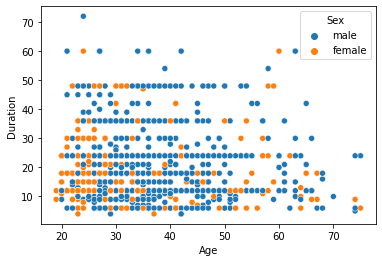

In [24]:
sns.scatterplot(df['Age'],df['Duration'],hue=df['Sex'])

c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='Credit amount'>

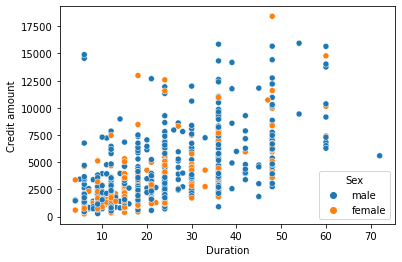

In [26]:
sns.scatterplot(df['Duration'],df['Credit amount'],hue=df['Sex'])

c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

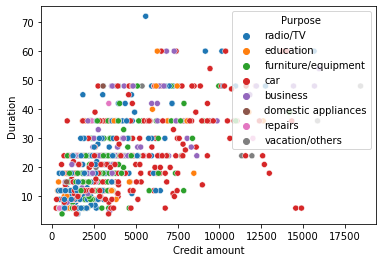

In [27]:
sns.scatterplot(df['Credit amount'],df['Duration'],hue=df['Purpose'])


In [28]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


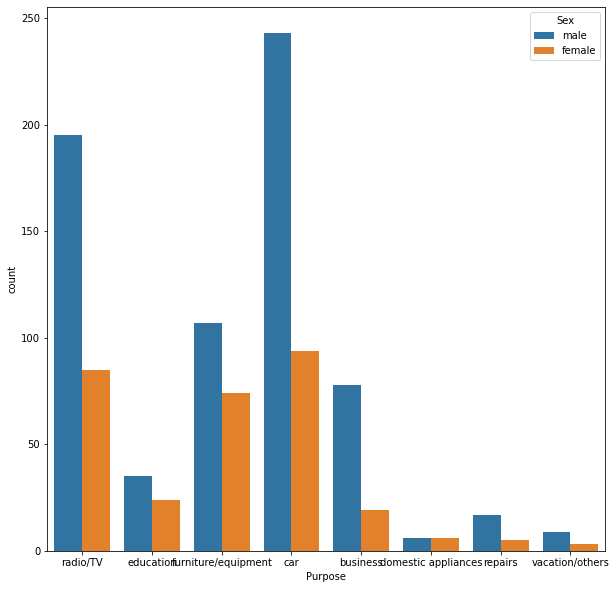

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(df['Purpose'],hue=df['Sex'])
plt.show()

c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Credit amount'>

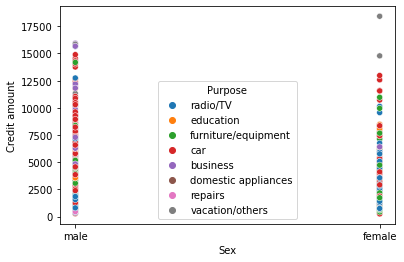

In [33]:
sns.scatterplot(df['Sex'],df['Credit amount'],hue=df['Purpose'])


In [38]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [44]:
df.groupby('Purpose')['Credit amount', 'Duration'].median()

C:\Users\Emy\AppData\Local\Temp/ipykernel_7572/4111252244.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Purpose')['Credit amount', 'Duration'].median()


,Credit amount,Duration
Purpose,,
business,3161.0,24.0
car,2679.0,18.0
domestic appliances,1249.0,13.5
education,1597.0,12.0
furniture/equipment,2578.0,18.0
radio/TV,1890.0,18.0
repairs,1749.0,16.5
vacation/others,6948.0,24.0


<AxesSubplot:>

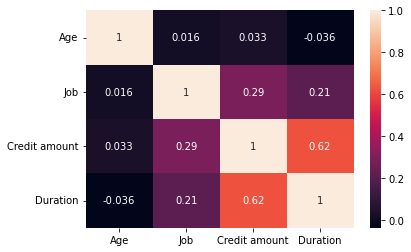

In [45]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Purpose', ylabel='Duration'>

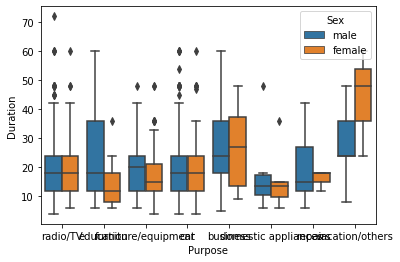

In [47]:
sns.boxplot(x=df['Purpose'],y=df['Duration'],hue=df['Sex'])

In [49]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [50]:
df=df.loc[:,['Age','Credit amount', 'Duration']]
df

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [51]:
df=np.log(df)

In [52]:
df.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


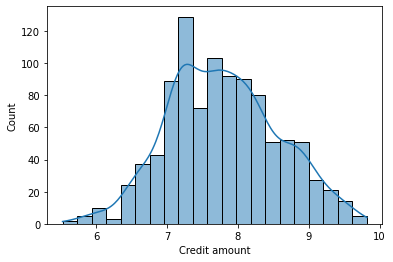

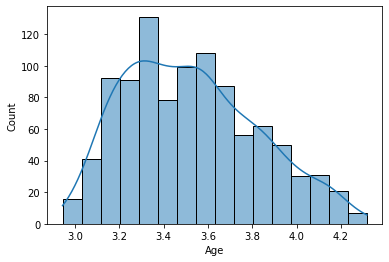

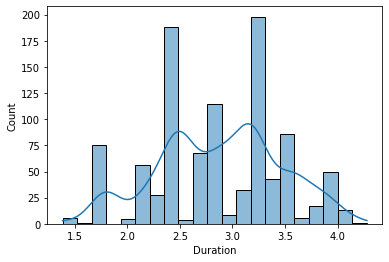

In [56]:
sns.histplot(df['Credit amount'],kde=True)
plt.show()
sns.histplot(df['Age'],kde=True)
plt.show()
sns.histplot(df['Duration'],kde=True)
plt.show()



In [71]:
K_=KMeans(n_clusters=5)
labels=K_.fit(df)
#print(labels.labels_)
pd.DataFrame({'cluster':labels.labels_})

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,cluster
0,3
1,2
2,0
3,2
4,2
...,...
995,3
996,2
997,1
998,4


In [72]:
df=df.assign(cluster=labels.labels_)

In [73]:
df.groupby('cluster').mean()

,Age,Credit amount,Duration
cluster,,,
0,3.538606,7.979020,2.551291
1,3.485142,6.568571,2.398182
2,3.542241,8.778193,3.479445
3,3.566718,7.245781,2.286332
4,3.483559,7.690497,3.157127


In [79]:
inetria=[]
for i in range(2,100):
    K_=KMeans(n_clusters=i)
    labels=K_.fit(df)
    inetria.append(K_.inertia_)

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with M

In [75]:
inetria

[1455.283839633039,
 728.3787501582385,
 503.85704994013275,
 297.98615379778414,
 267.2758062924857,
 247.23512163247074,
 226.9388820760613,
 210.48641975152785]

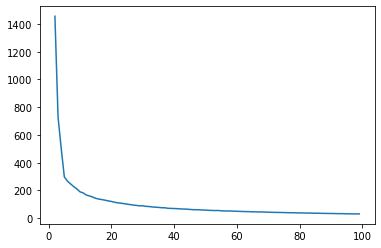

In [80]:
plt.plot(range(2,100),inetria)

In [ ]:
from sklearn.cl